<a href="https://colab.research.google.com/github/ErnyBSB/clusteringForLibraries/blob/main/Col_Dev_Vector_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NESTE NOTEBOOK:

a partir de uma classe CDU escolhida, efetuar a vetorização do DataFrame, Clusterização, Estudo dos Clusters e Visualização dos Cluster. Ao final, os clusters são exportados para a fase de análise dos clusters.


---



# IMPORTANDO E CRIANDO DATAFRAME

In [ ]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling nu

In [ ]:
#@title Bibliotecas

import pandas as pd
import datetime

import kagglehub

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import nltk


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer

import matplotlib.pyplot as plt
import re
import gc

import gensim
from gensim.models import Word2Vec

In [ ]:
#controle de erros em código Pandas (desabilita mensagens)
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
#@title Importa o DataSet do Kaggle

#import kagglehub
#ernestocarlosbode_books_metadata_with_topics_path = kagglehub.dataset_download('ernestocarlosbode/books-metadata')


ernestocarlosbode_books_metadata_path = kagglehub.dataset_download('ernestocarlosbode/books-metadata')


print('Data source import complete.')
print(ernestocarlosbode_books_metadata_path)

!ls /root/.cache/kagglehub/datasets/ernestocarlosbode/books-metadata/versions/1

100%|██████████| 7.43M/7.43M [00:01<00:00, 7.15MB/s]

Extracting files...


Data source import complete.
/root/.cache/kagglehub/datasets/ernestocarlosbode/books-metadata/versions/1
df_short_livro.csv


In [ ]:
#@title Criando o DataFrame df
file_path = f'{ernestocarlosbode_books_metadata_path}/df_short_livro.csv' #<< nome do arquivo no Kaggle
df = pd.read_csv(file_path, sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182811 entries, 0 to 182810
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   autor        142237 non-null  object 
 1   título       182811 non-null  object 
 2   imprenta     182801 non-null  object 
 3   material     182811 non-null  object 
 4   coleção      0 non-null       float64
 5   localização  181799 non-null  object 
 6   descrição    37850 non-null   object 
 7   data tombo   179624 non-null  object 
 8   exemplar     7015 non-null    object 
dtypes: float64(1), object(8)
memory usage: 12.6+ MB


# PRÉ-PROCESSAMENTO

inclui:


*   renomear colunas
*   remover caracteres
*   definir "slices" de dataFrame por classe CDU
*   definir a classe CDU de trabalho


---







In [ ]:
#@title Renomeando colunas com nomes mais curtos

df = df.rename(columns={
    'autor': 'author',
    'título': 'title',
    'imprenta': 'publish',
    'material': 'type',
    'coleção': 'collection',
    'localização': 'CDU',
    'descrição': 'description',
    'data tombo': 'dt_load',
    'exemplar': 'copies'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182811 entries, 0 to 182810
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   author       142237 non-null  object 
 1   title        182811 non-null  object 
 2   publish      182801 non-null  object 
 3   type         182811 non-null  object 
 4   collection   0 non-null       float64
 5   CDU          181799 non-null  object 
 6   description  37850 non-null   object 
 7   dt_load      179624 non-null  object 
 8   copies       7015 non-null    object 
dtypes: float64(1), object(8)
memory usage: 12.6+ MB


In [ ]:
#@title Dataframe sem títulos repetidos

df_unique = df.drop_duplicates(subset=['title'])

df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131296 entries, 0 to 182810
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   author       102164 non-null  object 
 1   title        131296 non-null  object 
 2   publish      131288 non-null  object 
 3   type         131296 non-null  object 
 4   collection   0 non-null       float64
 5   CDU          130457 non-null  object 
 6   description  12205 non-null   object 
 7   dt_load      128783 non-null  object 
 8   copies       1994 non-null    object 
dtypes: float64(1), object(8)
memory usage: 10.0+ MB


In [ ]:
#@title Checando uma coluna (exemplo)

df_unique['CDU']
print("------------------------------------------")
print(df_unique['CDU'].unique())
print("------------------------------------------")
print(df_unique['CDU'].nunique())
print("------------------------------------------")
print(df_unique['CDU'].describe())
print("------------------------------------------")

------------------------------------------
['918.153 MAYA-RO FLORE' '869.0(81) AMADO-J TENDA' '972.93 MALIN-J VERDA'
 ... '869.0(81) JESUS-CM QUART 9.REIMPR.' '17 ETICA-PV ETICA 6.IMPR.'
 '347.98 CARVA-FB LEGIT']
------------------------------------------
128876
------------------------------------------
count                     130457
unique                    128876
top       981(082.1) BRASI BRASI
freq                         184
Name: CDU, dtype: object
------------------------------------------


In [ ]:
#@title Pré-Processamento: acrescentar coluna Class_CDU
#(para definição da Classe operacional, ou de trabalho)


def extract_first_digit(text):
  if pd.isna(text) or not isinstance(text, str):
    return None
  match = re.search(r'\d', text)
  if match:
    return match.group(0)
  else:
    return None

df_unique['Class_CDU'] = df['CDU'].apply(extract_first_digit)

df_unique.info()


<class 'pandas.core.frame.DataFrame'>
Index: 131296 entries, 0 to 182810
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   author       102164 non-null  object 
 1   title        131296 non-null  object 
 2   publish      131288 non-null  object 
 3   type         131296 non-null  object 
 4   collection   0 non-null       float64
 5   CDU          130457 non-null  object 
 6   description  12205 non-null   object 
 7   dt_load      128783 non-null  object 
 8   copies       1994 non-null    object 
 9   Class_CDU    130457 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.0+ MB


In [ ]:
#@title Classes CDU no DataFrame df

# Display and count unique values in the 'coleção' column, excluding NaN values
unique_classes = df_unique['Class_CDU'].dropna().unique()
print(unique_classes)
print("\nNumber of unique values:", len(unique_classes))


['9' '8' '1' '3' '0' '6' '2' '5' '7']

Number of unique values: 9


In [ ]:
#@title DataFrames Slice's para cada classe CDU

# Loop through unique collections
for classe in unique_classes:
    # Slice the DataFrame for the current class
    df_slice = df_unique[df_unique['Class_CDU'] == classe]

    # Create a new DataFrame with the name df_slice_{collection}
    globals()[f'df_slice_{classe}'] = df_slice

# mostrando os dataframes slices por classe CDU
all_objects = dir()
df_slice_objects = [obj for obj in all_objects if obj.startswith("df_slice_")]
df_slice_objects


['df_slice_0',
 'df_slice_1',
 'df_slice_2',
 'df_slice_3',
 'df_slice_5',
 'df_slice_6',
 'df_slice_7',
 'df_slice_8',
 'df_slice_9']

In [ ]:
#@title Define a classe para vetorização e clustering
"""
aqui escolhemos uma das classes do DataFrame df_slice_objects. Isto é necessário
em função da quantidade total de linhas ser muito alta.
Trabalhando com uma classe por vez, minimizamos este problema.
"""

df_chosenClass = df_slice_9 #@param < classe escolhida

class_folder = 'df_slice_9' #@param < para uso de nome de caminhos exportação arquivos
print('Número total de títulos (únicos) nesta classe >> ', len(df_chosenClass.title))
print("-" * 20)
print(f'Classe Escolhida: {class_folder}')
print("-" * 20)
df_chosenClass.info()

Número total de títulos (únicos) nesta classe >>  11859
--------------------
Classe Escolhida: df_slice_9
--------------------
<class 'pandas.core.frame.DataFrame'>
Index: 11859 entries, 0 to 182803
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   author       10222 non-null  object 
 1   title        11859 non-null  object 
 2   publish      11858 non-null  object 
 3   type         11859 non-null  object 
 4   collection   0 non-null      float64
 5   CDU          11859 non-null  object 
 6   description  1624 non-null   object 
 7   dt_load      11686 non-null  object 
 8   copies       456 non-null    object 
 9   Class_CDU    11859 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1019.1+ KB


In [ ]:
#@title Pré-processando: removendo caracteres

def preprocess_text(text):
    if not isinstance(text, str):
        return ""  # or handle non-string values as needed

    text = re.sub(r'[^\w\s]', '', text) # Remove pontuação
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('portuguese'))
    tokens = [w for w in tokens if not w in stop_words]
    stemmer = RSLPStemmer()
    stemmed_tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(stemmed_tokens)

#df_chosenClass['author_processed'] = df_chosenClass['author'].apply(preprocess_text)
df_chosenClass['title_processed'] = df_chosenClass['title'].apply(preprocess_text)

In [ ]:
#@title Aplicando pré-processamento nas colunas escolhidas
df_chosenClass['title_processed'] = df_chosenClass['title'].apply(preprocess_text)
df_chosenClass['CDU_processed'] = df_chosenClass['CDU'].apply(preprocess_text)

# VETORIZAÇÃO


---



In [ ]:
#@title Vetorização: Embedding Word2Vec
"""
tentamos também vetorização com One-Hot-encoding e
TfidfVectorizer(), sem bons resultados.
"""

# Combine all preprocessed text values into a single list of lists
all_title_tokens = df_chosenClass['title_processed'].apply(lambda x: x.split()).tolist()
all_cdu_tokens = df_chosenClass['CDU_processed'].apply(lambda x: x.split()).tolist()

# Combine title and CDU tokens
all_tokens = all_title_tokens + all_cdu_tokens

# Train the Word2Vec model
model = Word2Vec(all_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the average vector for a text string
def get_text_vector(text_string):
    tokens = text_string.split()
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Apply the function to the 'title_processed' and 'CDU_processed' columns
df_chosenClass['title_embedding'] = df_chosenClass['title_processed'].apply(get_text_vector)
df_chosenClass['CDU_embedding'] = df_chosenClass['CDU_processed'].apply(get_text_vector)

# Convert the embedding columns to NumPy arrays
title_embedding = np.array(df_chosenClass['title_embedding'].tolist())
CDU_embedding = np.array(df_chosenClass['CDU_embedding'].tolist())

cdu_embedding = np.concatenate((title_embedding, CDU_embedding), axis=1)

# CLUSTERIZAÇÃO (por classe CDU escolhida)


---



In [ ]:
#@title Cria grupos 'v' número de vezes (loop) com "num_clusters" em cada grupo
num_clusters = 6 #@param {type:"integer"}
v = 1 #@param {type:"integer"}

dataframes = {} #<< dicionário para exportar dataframes clusterizados

# executa a clusterização até v vezes
for i in range(v):
  kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
  kmeans.fit(cdu_embedding)
  clusters = kmeans.labels_
  df_chosenClass['cluster'] = clusters # coluna cluster

  # cria os dataframes em grupos (execuções loop) até o número de cluster escolhido (num_clusters)
  for j in range(num_clusters):
    globals()[f'df_chosenClass_group_{i}_cluster_{j}'] = df_chosenClass[df_chosenClass['cluster'] == j]
    df_cluster = globals()[f'df_chosenClass_group_{i}_cluster_{j}']
    print(f"--- Loop {i} - Cluster {j} ---")
    print(f"Number of elements: {len(df_cluster)}")
    print("-" * 20)
    ## elimina as colunas desnecessárias para análise do cluster pelo LLM
    globals()[f'df_chosenClass_group_{i}_cluster_{j}'] = globals()[f'df_chosenClass_group_{i}_cluster_{j}'][['author', 'title', 'publish', 'CDU', 'cluster']]

    # alimenta o dicionário dataframes com dados (para merge operations)
    dataframes[(f'grupo_{i}', f'df_chosenClass_group_{i}_cluster_{j}')] = f'df_chosenClass_group_{i}_cluster_{j}'

--- Loop 0 - Cluster 0 ---
Number of elements: 2281
--------------------
--- Loop 0 - Cluster 1 ---
Number of elements: 3564
--------------------
--- Loop 0 - Cluster 2 ---
Number of elements: 1345
--------------------
--- Loop 0 - Cluster 3 ---
Number of elements: 435
--------------------
--- Loop 0 - Cluster 4 ---
Number of elements: 1183
--------------------
--- Loop 0 - Cluster 5 ---
Number of elements: 3051
--------------------


# ESTUDO DOS CLUSTERS GERADOS


---



In [ ]:
#@title Estatísticas da coluna df_chosenClass.cluster

# Calculate descriptive statistics for the 'cluster' column
cluster_stats = df_chosenClass['cluster'].describe()
print("Descriptive Statistics for 'cluster' column:")
print(cluster_stats)

# Calculate the mean of the 'cluster' column
cluster_mean = df_chosenClass['cluster'].mean()
print("\nMean of 'cluster' column:", cluster_mean)

# Display the distribution of the 'cluster' column
cluster_distribution = df_chosenClass['cluster'].value_counts(normalize=True) * 100
print("\nDistribution of 'cluster' column:")
cluster_distribution


Descriptive Statistics for 'cluster' column:
count    11859.000000
mean         2.322793
std          1.928000
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max          5.000000
Name: cluster, dtype: float64

Mean of 'cluster' column: 2.3227928155831012

Distribution of 'cluster' column:


,proportion
cluster,
1,30.053124
5,25.727296
0,19.234337
2,11.341597
4,9.975546
3,3.668100


# GRÁFICOS VISUALIZAÇÃO

o quanto são esféricos


---



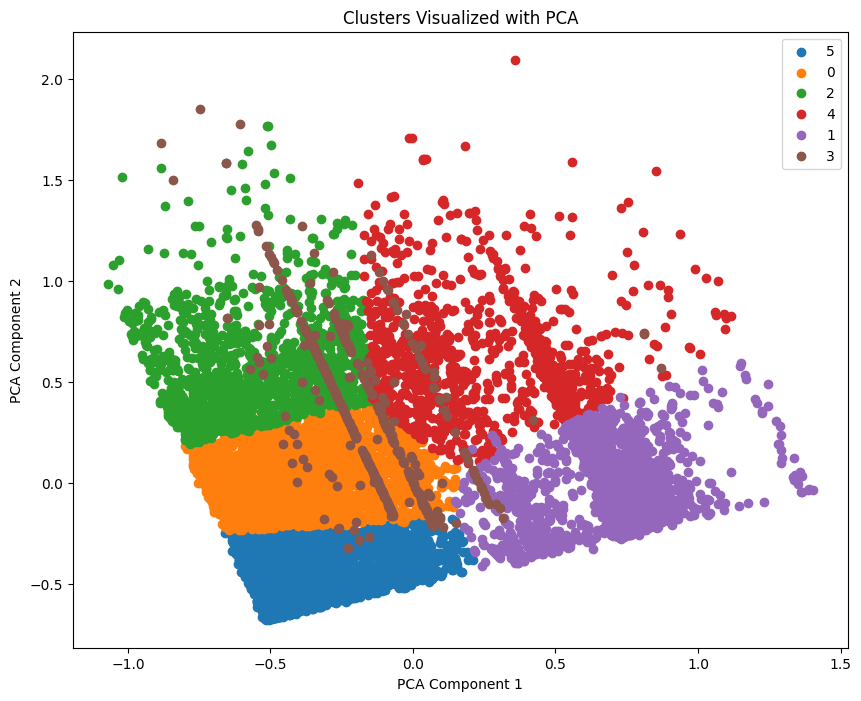

In [ ]:
#@title Gráfico PCA: df_chosenClass.cluster ORIGINAL

from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
pca_result = pca.fit_transform(cdu_embedding)

df_chosenClass['pca_one'] = pca_result[:, 0]
df_chosenClass['pca_two'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
for cluster in df_chosenClass['cluster'].unique():
    subset = df_chosenClass[df_chosenClass['cluster'] == cluster]
    plt.scatter(subset['pca_one'], subset['pca_two'], label=str(cluster))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized with PCA')
plt.legend()
plt.show()

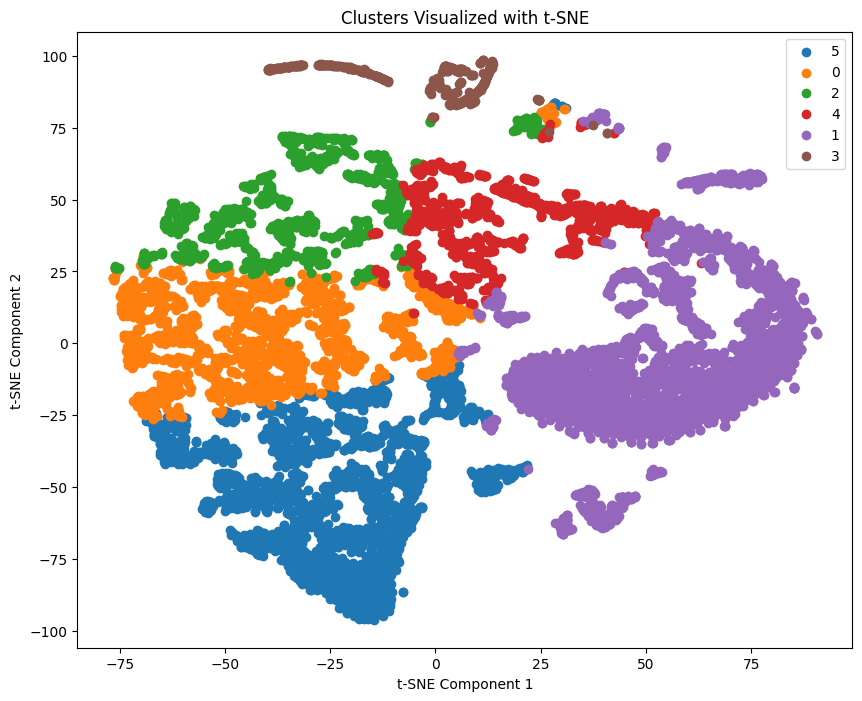

In [ ]:
#@title Gráfico t-SNE: df_chosenClass.cluster ORIGINAL

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0) # Reduce to 2 dimensions
tsne_result = tsne.fit_transform(cdu_embedding)

df_chosenClass['tsne_one'] = tsne_result[:, 0]
df_chosenClass['tsne_two'] = tsne_result[:, 1]

plt.figure(figsize=(10, 8))
for cluster in df_chosenClass['cluster'].unique():
    subset = df_chosenClass[df_chosenClass['cluster'] == cluster]
    plt.scatter(subset['tsne_one'], subset['tsne_two'], label=str(cluster))
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters Visualized with t-SNE')
plt.legend()
plt.show()

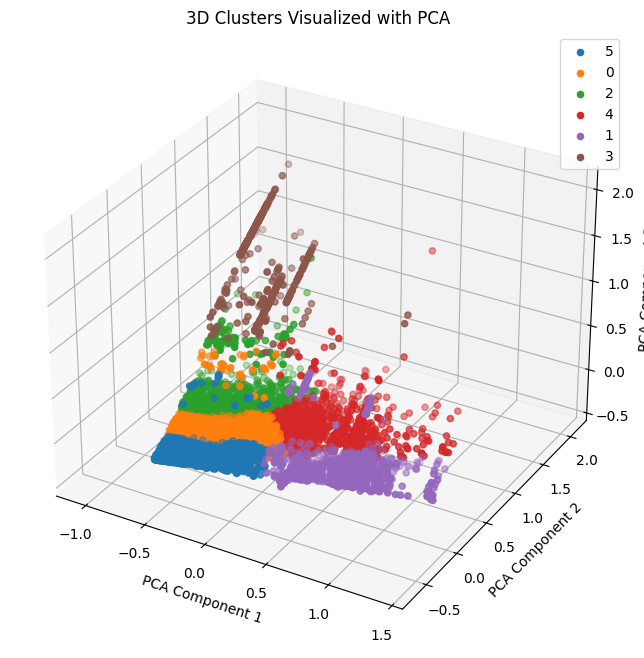

In [ ]:
#@title Visualização 3D

from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # Reduce to 3 dimensions for plotting
pca_result = pca.fit_transform(cdu_embedding)

df_chosenClass['pca_one'] = pca_result[:, 0]
df_chosenClass['pca_two'] = pca_result[:, 1]
df_chosenClass['pca_three'] = pca_result[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in df_chosenClass['cluster'].unique():
    subset = df_chosenClass[df_chosenClass['cluster'] == cluster]
    ax.scatter(subset['pca_one'], subset['pca_two'], subset['pca_three'], label=str(cluster))

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Clusters Visualized with PCA')
ax.legend()
plt.show()

In [ ]:
#@title Visualização Interativa com Plotly

import plotly.express as px

pca = PCA(n_components=2)
pca_result = pca.fit_transform(cdu_embedding)
df_chosenClass['pca_one'] = pca_result[:, 0]
df_chosenClass['pca_two'] = pca_result[:, 1]

fig = px.scatter(df_chosenClass, x='pca_one', y='pca_two', color='cluster',
                 hover_data=['title', 'author', 'CDU'])  # Add more columns to hover data
fig.update_layout(title='Interactive Clusters Visualized with Plotly')
fig.show()

# EXPORTAR PARA ANÁLISE LLM

In [ ]:
#@title Conexão para exportar arquivos clusters
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Exportando... /content/drive/MyDrive/CodeInTCC/dataFrames/df_chosenClass.csv

df_chosenClass.to_csv('/content/drive/MyDrive/CodeInTCC/dataFrames/df_chosenClass_v6clusters.csv', sep=';', encoding='utf-8', index=False) # exportando classe 9 com 6 clusters
